In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 558_Assignments_Code			'Foundation Financial Project.ipynb'
'Copy of 5-Mortality-Model_1_22.ipynb'	 Kaggle
 data					 my_own_code
'Fondation Final Project_Mortality'	'powerful word.ipynb'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Model Data Set Generating - mdl_data

In [4]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = '/content/drive/My Drive/Colab Notebooks/Fondation Final Project_Mortality/data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [5]:
df[0][:2]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13


In [6]:
'''drop unused columns'''
'''Year, Age, Sex, Race, detail_age, rankable_cause_recode'''
#use year,sex,race,age_band, cause_recode
unused_cols = ['education_1989_revision','education_2003_revision','education_reporting_flag', 'month_of_death',
              'marital_status', 'day_of_week_of_death','injury_at_work', 'manner_of_death', 'detail_age',
               'activity_code']
for i in range(11):
    df[i].drop(unused_cols, axis=1, inplace=True)
    print(df[i].columns.values)

['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']
['sex' 'current_data_year' 'race' '5y_age_band_recode'
 'rankable_cause_recode']


In [0]:
mdl_data = df[0]
for i in range(1,11):
  mdl_data = pd.concat([mdl_data,df[i]], axis=0)
#print(mdl_data['current_data_year'].unique())
del df

In [0]:
mdl_data = mdl_data[mdl_data['rankable_cause_recode'].isin([22])]

In [9]:
mdl_data

,sex,current_data_year,race,5y_age_band_recode,rankable_cause_recode
14,M,2005,1,16,22
23,F,2005,1,17,22
24,M,2005,1,16,22
25,M,2005,3,10,22
32,M,2005,1,16,22
...,...,...,...,...,...
2718168,M,2015,2,14,22
2718178,M,2015,2,1,22
2718181,M,2015,2,14,22
2718192,F,2015,2,10,22


In [0]:
'''Store unique value for each predictor'''

'''year = mdl_data['current_data_year'].unique()
sex = mdl_data['sex'].unique()
race = sorted(mdl_data['race'].unique())
age = sorted(mdl_data['5y_age_band_recode'].unique())
cause = sorted(mdl_data['rankable_cause_recode'].unique())
print(year)
print(sex)
print(race)
print(age)
print(cause)'''

In [0]:
gbydata = mdl_data.groupby(by=['sex', 'current_data_year','race','5y_age_band_recode']).size()

In [11]:
gbydata.values

array([937, 187, 215, ...,  12,  13,   5])

In [0]:
x = []
for i in range(gbydata.size):
  x.append(list(gbydata.index.values[i]))
#x

In [13]:
mdl_data = pd.DataFrame(data=x, columns=['sex', 'current_data_year', 'race', '5y_age_band_recode'])
mdl_data['death_num'] = gbydata.values
mdl_data

,sex,current_data_year,race,5y_age_band_recode,death_num
0,F,2005,1,1,937
1,F,2005,1,2,187
2,F,2005,1,3,215
3,F,2005,1,4,308
4,F,2005,1,5,487
...,...,...,...,...,...
5811,M,2015,78,16,19
5812,M,2015,78,17,24
5813,M,2015,78,18,12
5814,M,2015,78,19,13


# Data Wrangling

In [14]:
mdl_data.describe()

,current_data_year,race,5y_age_band_recode,death_num
count,5816.000000,5816.000000,5816.000000,5816.000000
mean,2010.036451,24.351444,11.889443,837.458906
std,3.173305,26.280921,6.112107,4061.180652
min,2005.000000,1.000000,1.000000,1.000000
25%,2007.000000,3.000000,7.000000,3.000000
50%,2010.000000,7.000000,12.000000,13.000000
75%,2013.000000,48.000000,17.000000,69.250000
max,2015.000000,78.000000,27.000000,50659.000000


## death number distribution

In [15]:
mdl_data.groupby(by=['death_num']).size().sort_values()

death_num
50659      1
1139       1
1143       1
1154       1
1160       1
        ... 
5        225
4        267
3        357
2        528
1        678
Length: 961, dtype: int64

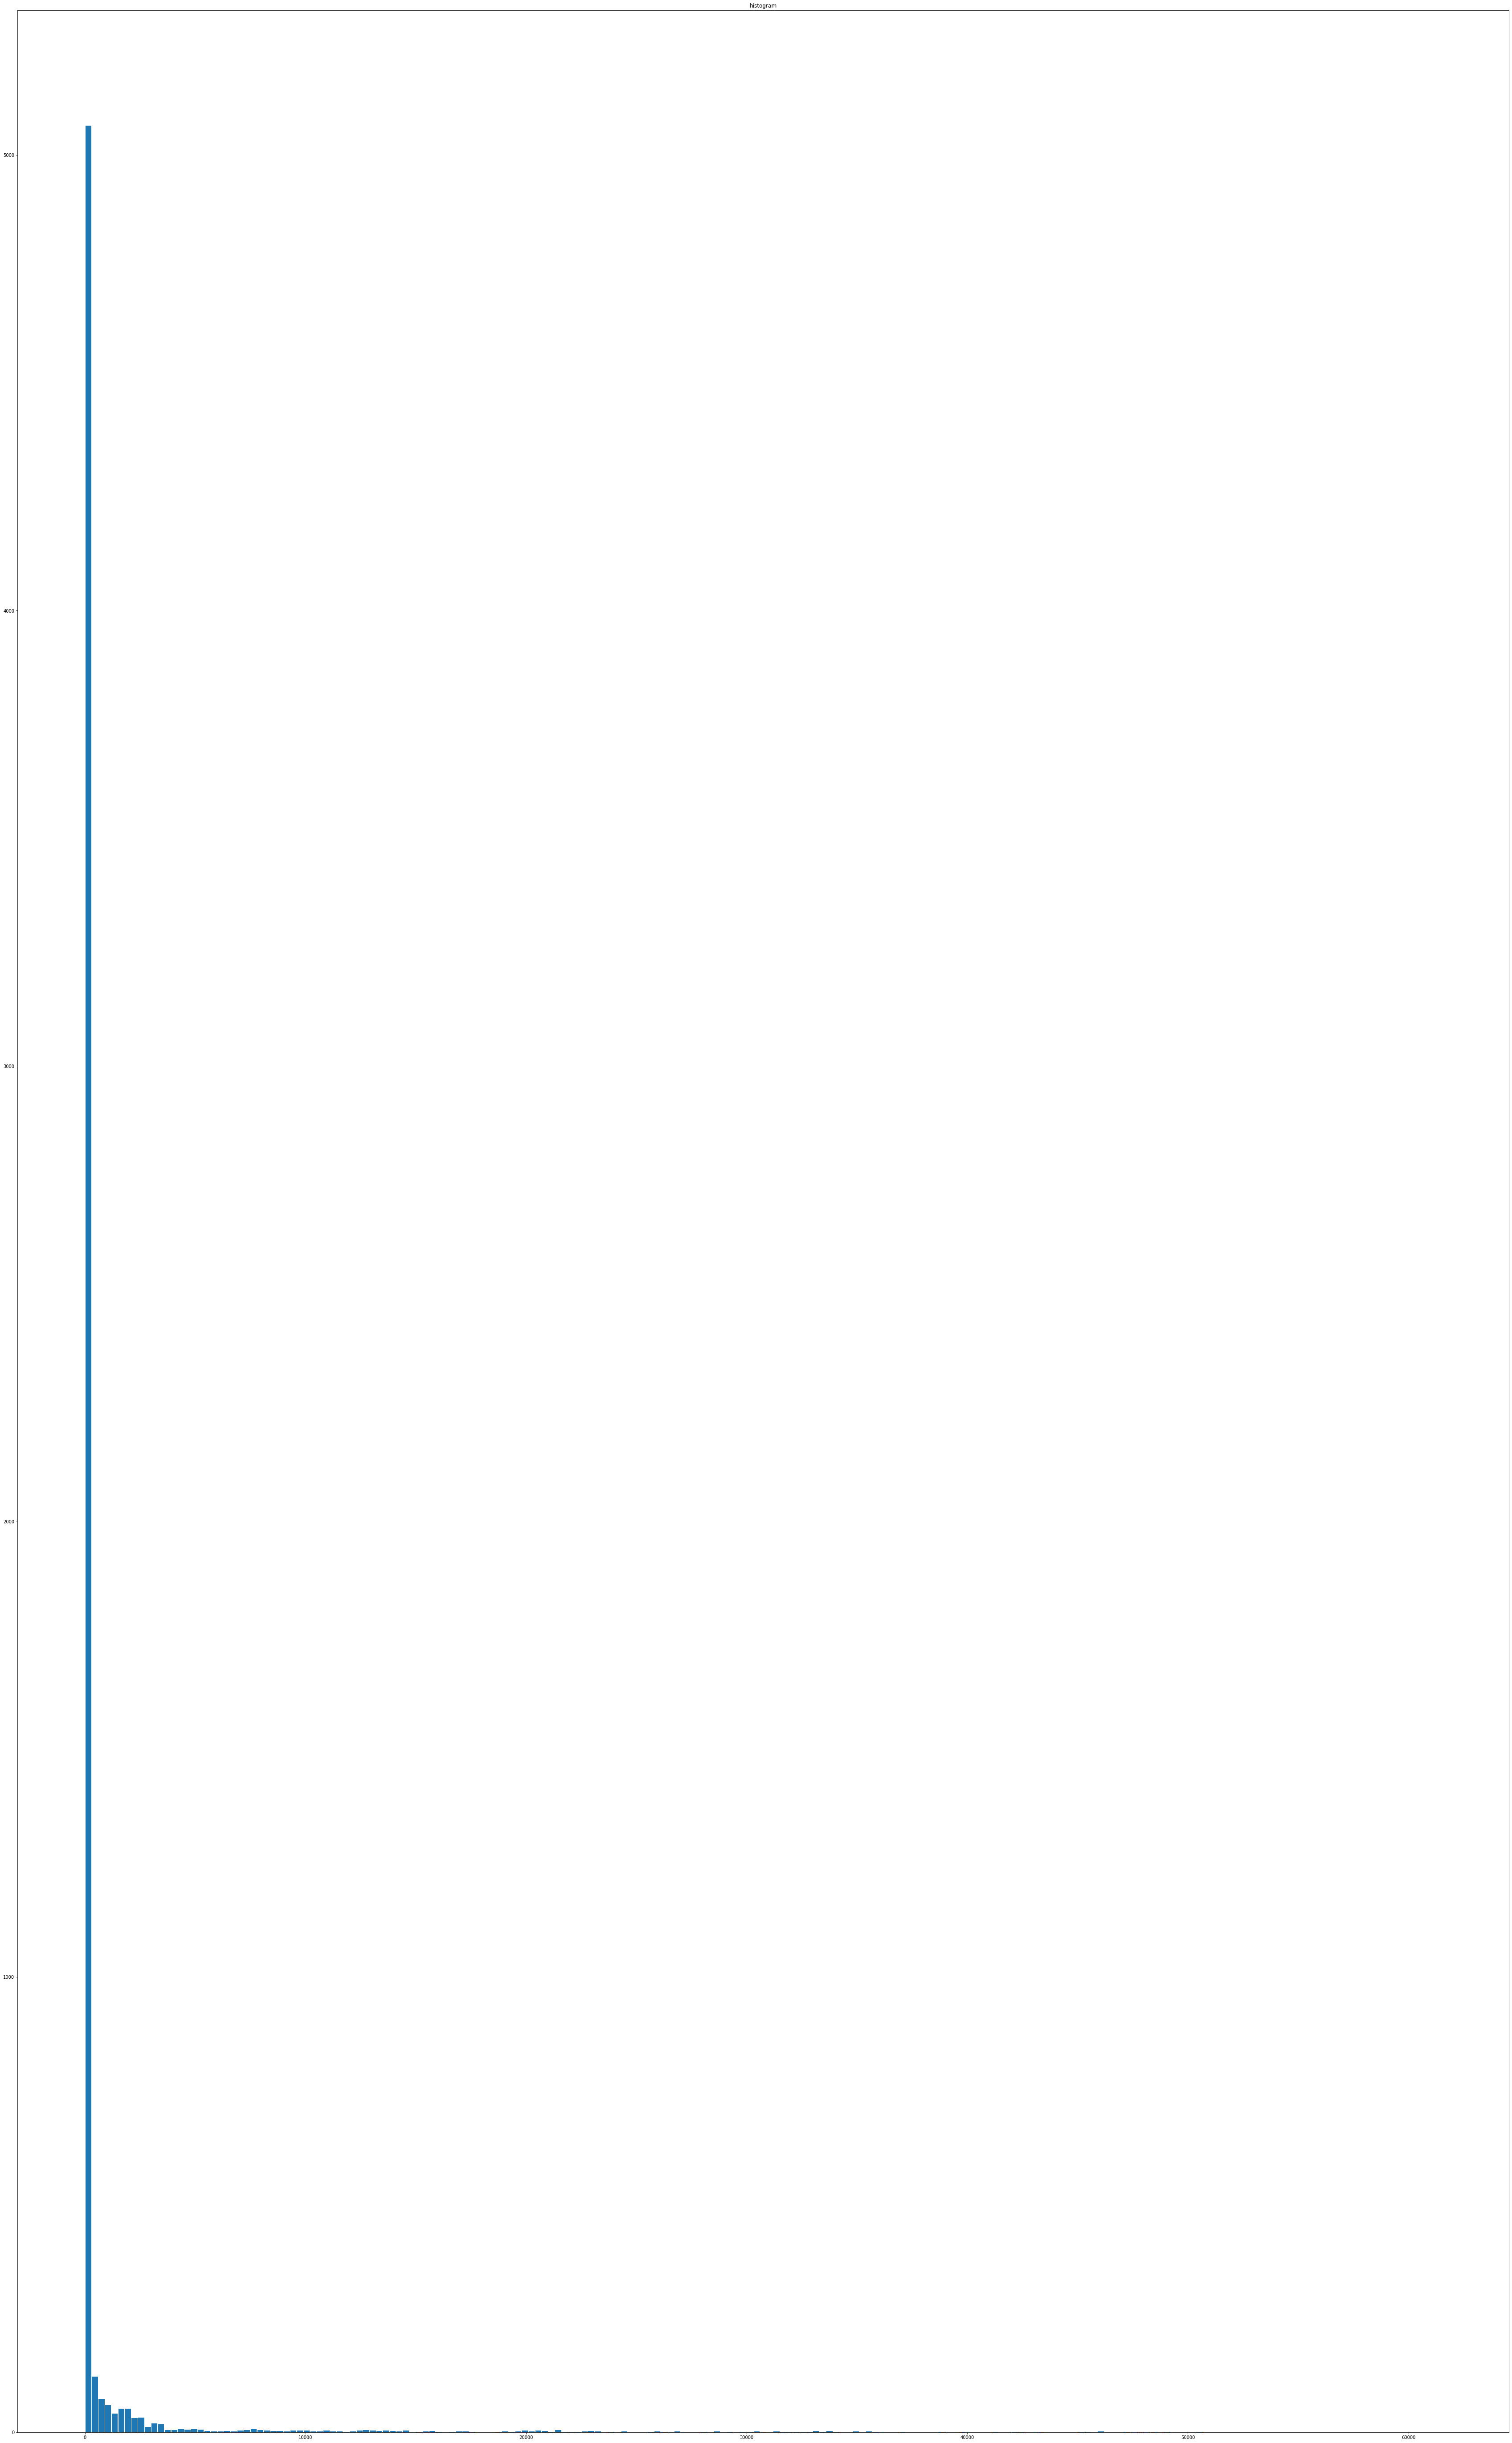

In [16]:
plt.figure(figsize=(60,100))
binblock=np.arange(0, 61786,300)
plt.hist(mdl_data['death_num'], bins=binblock, rwidth=0.9)
#plt.ylim(0,100)
#plt.xlim(0,9000)
plt.title("histogram")
plt.show()

## year, sex, race, age distribution

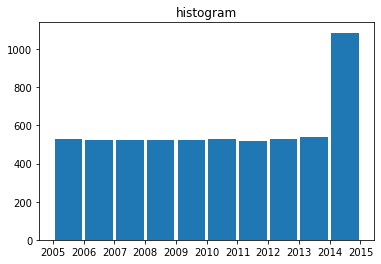

In [17]:
#year
#np.unique(mdl_data['current_data_year'])
binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['current_data_year'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(2005,2016))
plt.show()

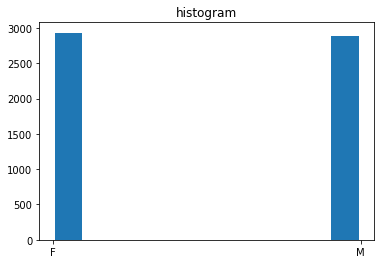

In [18]:
#sex
#np.unique(mdl_data['current_data_year'])
#binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['sex'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [19]:
np.unique(mdl_data['race'])

array([ 1,  2,  3,  4,  5,  6,  7, 18, 28, 38, 48, 58, 68, 78])

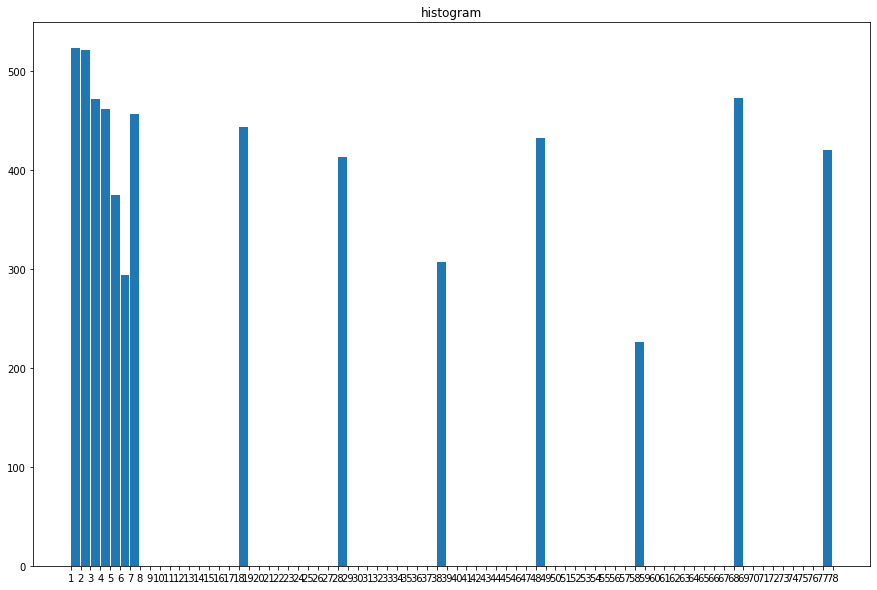

In [20]:
#race
#np.unique(mdl_data['sex'])
plt.figure(figsize=(15,10))
binblock=np.arange(1,79, 1)
plt.hist(mdl_data['race'], bins=binblock, rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(1,79))
plt.show()

In [21]:
np.unique(mdl_data['5y_age_band_recode'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 27])

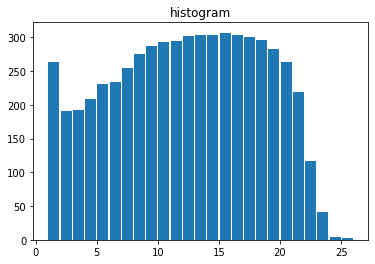

In [22]:
#gae
#np.unique(mdl_data['sex'])
binblock=np.arange(1,27, 1)
plt.hist(mdl_data['5y_age_band_recode'], bins=binblock, rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

# Relation Visualization



## current_data_year ~ death number

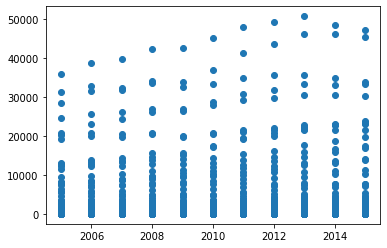

In [23]:
plt.scatter(mdl_data['current_data_year'], mdl_data['death_num'])
plt.show()

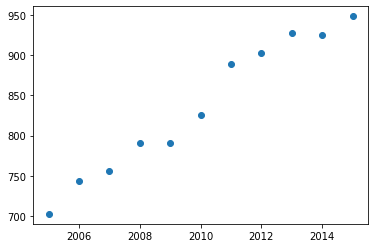

In [24]:
dnum_year = mdl_data[['current_data_year','death_num']].groupby('current_data_year').mean().reset_index()
plt.scatter(dnum_year['current_data_year'], dnum_year['death_num'])
plt.show()

## sex - death number relation


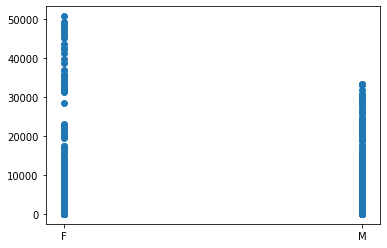

In [25]:
plt.scatter(mdl_data['sex'], mdl_data['death_num'])
plt.show()

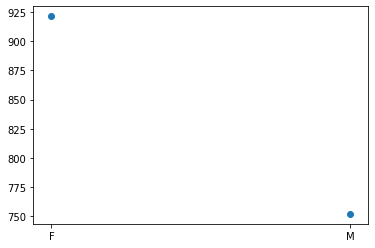

In [26]:
dnum_sex = mdl_data[['sex','death_num']].groupby('sex').mean().reset_index()
plt.scatter(dnum_sex['sex'], dnum_sex['death_num'])
plt.show()

## Race ~ Death Number
problem: unbalanced number of death for various race
  need a percentage data of each race to solve the problem.

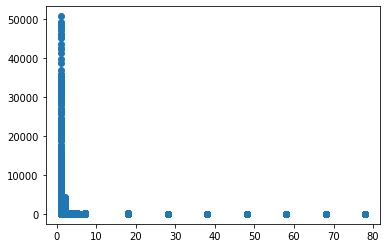

In [27]:
plt.scatter(mdl_data['race'], mdl_data['death_num'])
#x_labels = mdl_data['race'].unique().astype(str)
#plt.xticks()
plt.show()

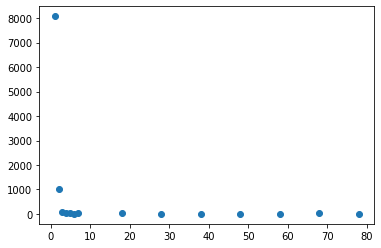

In [28]:
dnum_race = mdl_data[['race','death_num']].groupby('race').mean().reset_index()
plt.scatter(dnum_race['race'], dnum_race['death_num'])
plt.show()

## 5y_age_band_recode ~ Death Number

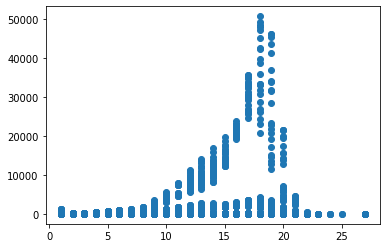

In [29]:
plt.scatter(mdl_data['5y_age_band_recode'], mdl_data['death_num'])
plt.show()

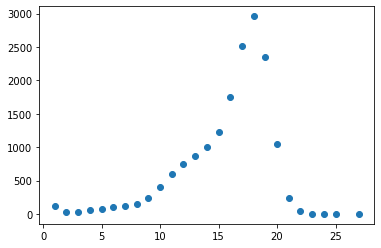

In [30]:
dnum_age = mdl_data[['5y_age_band_recode','death_num']].groupby('5y_age_band_recode').mean().reset_index()
plt.scatter(dnum_age['5y_age_band_recode'], dnum_age['death_num'])
plt.show()

# Feature Engineering

In [31]:
sex_onehot = pd.get_dummies(mdl_data['sex'],prefix='sex')
mdl_data['racestr'] = mdl_data['race'].astype(str)
race_onehot = pd.get_dummies(mdl_data['racestr'],prefix='race')
mdl_data = pd.concat([mdl_data, sex_onehot, race_onehot], axis=1)
mdl_data

,sex,current_data_year,race,5y_age_band_recode,death_num,racestr,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78
0,F,2005,1,1,937,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,2005,1,2,187,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,2005,1,3,215,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,F,2005,1,4,308,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,2005,1,5,487,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,M,2015,78,16,19,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5812,M,2015,78,17,24,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5813,M,2015,78,18,12,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5814,M,2015,78,19,13,78,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
mdl_data = mdl_data.drop(['racestr'],axis = 1)
mdl_data

,sex,current_data_year,race,5y_age_band_recode,death_num,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78
0,F,2005,1,1,937,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,2005,1,2,187,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,2005,1,3,215,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,F,2005,1,4,308,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,2005,1,5,487,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,M,2015,78,16,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5812,M,2015,78,17,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5813,M,2015,78,18,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5814,M,2015,78,19,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modeling 1st Try

In [33]:
mdl_data.columns

Index(['sex', 'current_data_year', 'race', '5y_age_band_recode', 'death_num',
       'sex_F', 'sex_M', 'race_1', 'race_18', 'race_2', 'race_28', 'race_3',
       'race_38', 'race_4', 'race_48', 'race_5', 'race_58', 'race_6',
       'race_68', 'race_7', 'race_78'],
      dtype='object')

In [34]:
X=mdl_data[['current_data_year', '5y_age_band_recode', 'sex_F',
       'sex_M', 'race_1', 'race_18', 'race_2', 'race_28', 'race_3', 'race_38',
       'race_4', 'race_48', 'race_5', 'race_58', 'race_6', 'race_68', 'race_7',
       'race_78']]
y=mdl_data['death_num']
X=sm.add_constant(X)
X

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,current_data_year,5y_age_band_recode,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78
0,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2005,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2005,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,2005,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,2005,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,1.0,2015,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5812,1.0,2015,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5813,1.0,2015,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5814,1.0,2015,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
model_1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              death_num   No. Observations:                 5816
Model:                            GLM   Df Residuals:                     5799
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1271e+06
Date:                Thu, 28 Nov 2019   Deviance:                   6.2258e+06
Time:                        19:10:04   Pearson chi2:                 6.09e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -44.3395      0

In [36]:
mdl_data['pred1'] = model_1.predict(X)
mdl_data

,sex,current_data_year,race,5y_age_band_recode,death_num,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,pred1
0,F,2005,1,1,937,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3008.016584
1,F,2005,1,2,187,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3217.162224
2,F,2005,1,3,215,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3440.849639
3,F,2005,1,4,308,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3680.089910
4,F,2005,1,5,487,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3935.964417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,M,2015,78,16,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.275438
5812,M,2015,78,17,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13.128942
5813,M,2015,78,18,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14.041790
5814,M,2015,78,19,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15.018107


## Interpretion & Visualize

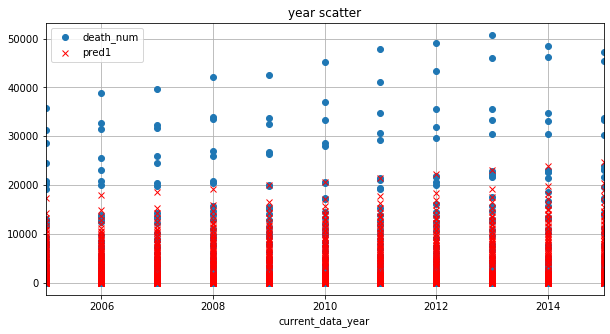

In [37]:
# Year
mdl_data.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('year scatter')
plt.show()

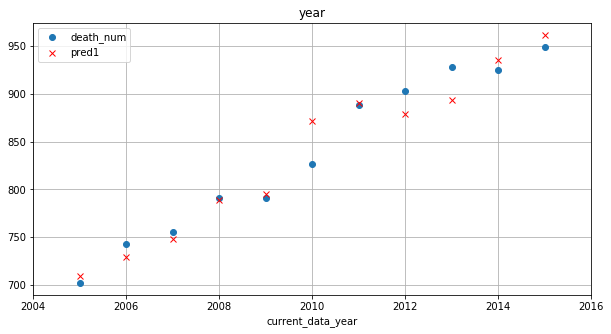

In [38]:
data_agg=mdl_data[['pred1','death_num', 'current_data_year']].groupby('current_data_year').mean().reset_index()
data_agg.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim(2004,2016)
plt.title('year')
plt.show()

In [0]:
# 5y_age_band_recode

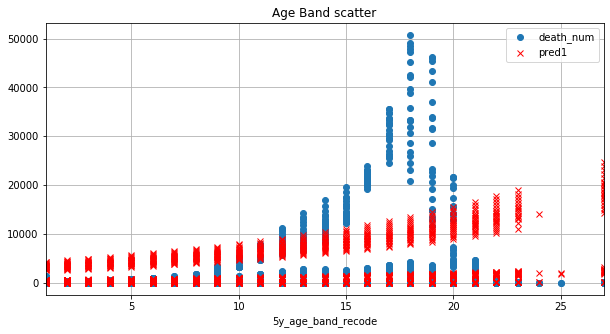

In [39]:
mdl_data.plot(x='5y_age_band_recode', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('Age Band scatter')
plt.show()

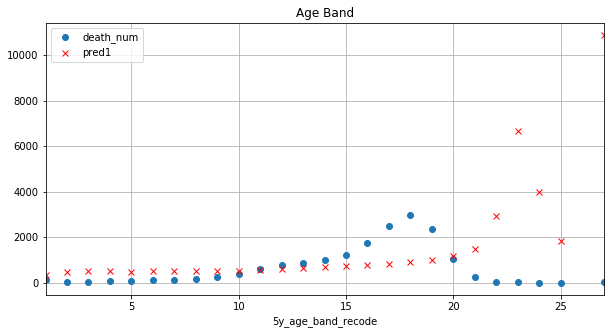

In [40]:
data_agg=mdl_data[['pred1','death_num', '5y_age_band_recode']].groupby('5y_age_band_recode').mean().reset_index()
data_agg.plot(x='5y_age_band_recode', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
#plt.xlim(2004,2016)
plt.title('Age Band')
plt.show()

In [0]:
# Sex

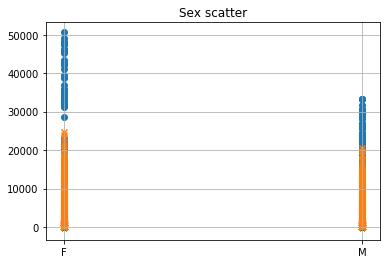

In [41]:
plt.scatter(x=mdl_data['sex'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['sex'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='sex', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Sex scatter')
plt.show()

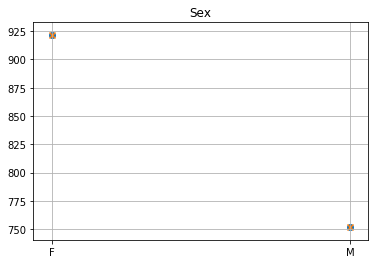

In [42]:
data_agg=mdl_data[['pred1','death_num', 'sex']].groupby('sex').mean().reset_index()
plt.scatter(x=data_agg['sex'], y=data_agg['death_num'])
plt.scatter(x=data_agg['sex'], y=data_agg['pred1'], marker='x')
plt.grid(axis='both')
plt.title('Sex')
plt.show()

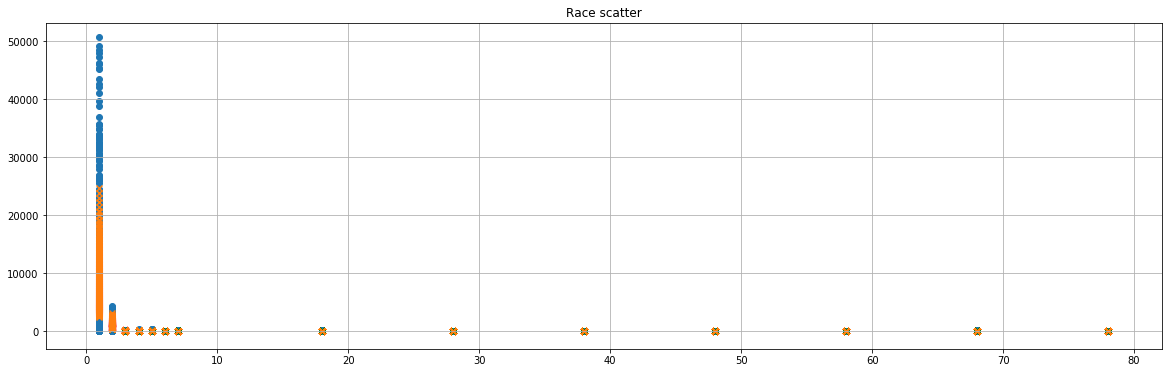

In [43]:
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['race'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['race'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

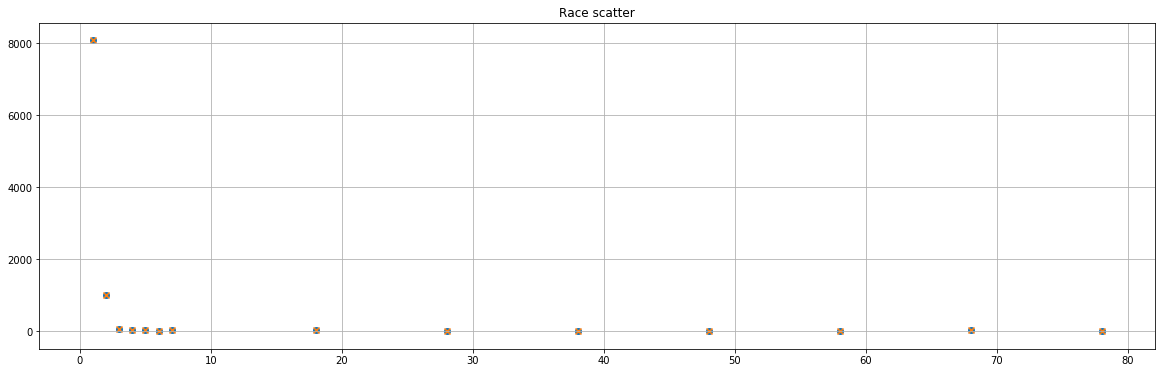

In [44]:
data_agg=mdl_data[['pred1','death_num', 'race']].groupby('race').mean().reset_index()
plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['race'], y=data_agg['death_num'])
plt.scatter(x=data_agg['race'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [46]:
print(mean_squared_error(mdl_data['death_num'], mdl_data['pred1']))

10641207.736824472


# # Modeling 2nd Try

In [0]:
mdl_data['year_2'] = np.power(mdl_data['current_data_year'],3)

In [0]:
X=mdl_data[['year_2', '5y_age_band_recode', 'sex_F',
       'sex_M', 'race_1', 'race_18', 'race_2', 'race_28', 'race_3', 'race_38',
       'race_4', 'race_48', 'race_5', 'race_58', 'race_6', 'race_68', 'race_7',
       'race_78']]
y=mdl_data['death_num']
X=sm.add_constant(X)
X

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,year_2,5y_age_band_recode,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78
0,1.0,8060150125,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,8060150125,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,8060150125,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,8060150125,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,8060150125,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,1.0,8181353375,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5520,1.0,8181353375,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5521,1.0,8181353375,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5522,1.0,8181353375,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
model_2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              death_num   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5508
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.0330e+06
Date:                Thu, 28 Nov 2019   Deviance:                   1.0038e+07
Time:                        18:59:43   Pearson chi2:                 9.83e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7786      0

In [0]:
mdl_data['pred2'] = model_2.predict()

In [0]:
mdl_data

,sex,current_data_year,race,5y_age_band_recode,death_num,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,pred1,year_2,pred2
0,F,2005,1,1,142,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4286.759159,-1.577387,4286.700179
1,F,2005,1,2,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4575.625105,-1.577387,4575.562226
2,F,2005,1,3,39,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4883.956463,-1.577387,4883.889428
3,F,2005,1,4,86,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5213.064922,-1.577387,5212.993457
4,F,2005,1,5,142,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5564.350561,-1.577387,5564.274373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,M,2015,78,17,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.025389,1.574252,21.025709
5520,M,2015,78,18,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22.442198,1.574252,22.442540
5521,M,2015,78,19,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23.954480,1.574252,23.954845
5522,M,2015,78,20,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25.568667,1.574252,25.569058


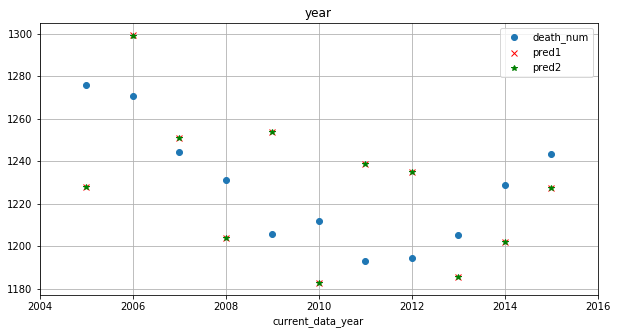

In [0]:
data_agg=mdl_data[['pred1','pred2','death_num', 'current_data_year']].groupby('current_data_year').mean().reset_index()
data_agg.plot(x='current_data_year', y=['death_num', 'pred1', 'pred2'], figsize=(10,5), grid=True, style=['o','rx', 'g*'])
plt.xlim(2004,2016)
plt.title('year')
plt.show()